In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

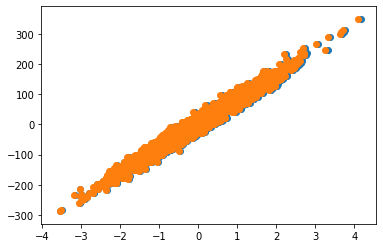

In [2]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")

x=dfx.values
y=dfy.values

X=(x-x.mean())/x.std()
Y=y

plt.scatter(X,Y)

plt.scatter(x,y)
plt.show()

In [3]:
print(X.shape)

(3750, 1)


In [16]:
def hypo(x,theta):
    return theta[0]+theta[1]*x

def error2(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        err+=(hypo(X[i],theta)-Y[i])**2
        
    return err

def changeInGrad(X,Y,theta):
    
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        grad[0]+=(hypo(X[i],theta)-Y[i])
        grad[1]+=(hypo(X[i],theta)-Y[i])*X[i]
        
    return grad

def linerReg2(X,Y,lrate=0.0001):
    
    theta=np.zeros((2,))
    error_list=[]
    e=error2(X,Y,theta)
    
    itr=0;
    while(itr<100):
        grad=changeInGrad(X,Y,theta)
        e=error2(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-lrate*grad[0]
        theta[1]=theta[1]-lrate*grad[1]
        itr+=1
        
    return theta,error_list
        

[ 0.68386897 79.90573694]


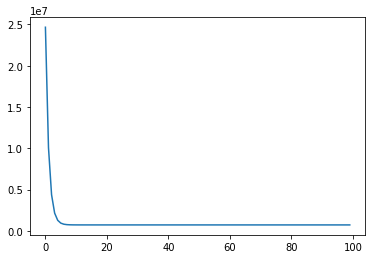

In [17]:
final_theta,error_lit=linerReg2(X,Y)
print(final_theta)

plt.plot(error_lit)
plt.show()

In [26]:
dfxtest=pd.read_csv("Linear_X_Test.csv")
xtest=dfxtest.values
print(xtest.shape)

(1250, 1)


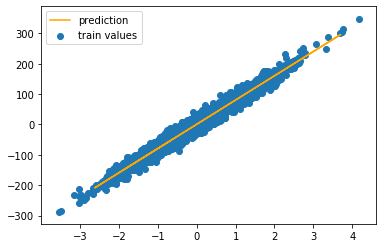

In [25]:

plt.plot(xtest,hypo(xtest,final_theta),color='orange',label="prediction")
plt.scatter(X,Y,label="train values")
plt.legend()
plt.show()

In [21]:
size=int(dfxtest.values.shape[0])
anslist=[]
for i in range(size):
    query_x=dfxtest.values[i]
    x=int(hypo(query_x,final_theta))
    anslist.append(x)

In [22]:
dict={"y" : anslist}
df = pd.DataFrame(dict)  
df.to_csv('predict_linear_reg.csv',index_label=None,index=False)